#Upfront Pricing Precision Enhancement 🚗
##Crunching the Numbers: Identifying Top Opportunities for a Taxi App Upfront Pricing Precision Enhancement
---

by Prakhar Srivastava


In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!mkdir dataset

##Loading the data

In [ ]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/Test.csv.xlsx")

In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 03:37:30.573,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 02:26:18.924,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35.423,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 06:34:53.782,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:23.996,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:33.858,10.89,13.7,15672,1449,1,client,finished,...,NaN,CA.5.45,finished,finished,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0
4939,2192,2192,2020-02-22 18:15:45.493,8789.28,NaN,5712,1173,0,client,finished,...,NaN,CA.5.44,finished,finished,DA.4.37,859,Samsung SM-G928F,0,0,NaN
4940,4051,4051,2020-03-12 23:08:31.109,7.50,7.4,5303,486,1,client,finished,...,NaN,CA.5.45,finished,finished,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0
4941,3636,3636,2020-03-08 20:15:04.452,3.06,8.1,3528,338,1,client,finished,...,NaN,CA.5.46,finished,finished,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0


###Preprocessing the data

I made sure to perform preprocessing in a way that retains all necessary data columns and rows and ensures that no important information is deleted.

In [ ]:
# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,ticket_id_new,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 03:37:30.573,4.04,10.0,2839,700,1,client,finished,...,1376,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 02:26:18.924,6.09,3.6,5698,493,1,client,finished,...,2035,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35.423,4.32,3.5,4426,695,1,client,finished,...,2222,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 06:34:53.782,72871.72,NaN,49748,1400,0,client,finished,...,1788,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:23.996,20032.50,19500.0,10273,5067,1,client,finished,...,2710,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:33.858,10.89,13.7,15672,1449,1,client,finished,...,517,CA.5.45,finished,finished,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0
4939,2192,2192,2020-02-22 18:15:45.493,8789.28,NaN,5712,1173,0,client,finished,...,3861,CA.5.44,finished,finished,DA.4.37,859,Samsung SM-G928F,0,0,NaN
4940,4051,4051,2020-03-12 23:08:31.109,7.50,7.4,5303,486,1,client,finished,...,1156,CA.5.45,finished,finished,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0
4941,3636,3636,2020-03-08 20:15:04.452,3.06,8.1,3528,338,1,client,finished,...,651,CA.5.46,finished,finished,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0


In [ ]:
# Replace NaN values with 0
df = df.fillna(0)

In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,ticket_id_new,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 03:37:30.573,4.04,10.0,2839,700,1,client,finished,...,1376,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 02:26:18.924,6.09,3.6,5698,493,1,client,finished,...,2035,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,0.0
2,657,657,2020-02-08 11:50:35.423,4.32,3.5,4426,695,1,client,finished,...,2222,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 06:34:53.782,72871.72,0.0,49748,1400,0,client,finished,...,1788,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,0.0
4,1176,1176,2020-02-13 17:31:23.996,20032.50,19500.0,10273,5067,1,client,finished,...,2710,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:33.858,10.89,13.7,15672,1449,1,client,finished,...,517,CA.5.45,finished,finished,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0
4939,2192,2192,2020-02-22 18:15:45.493,8789.28,0.0,5712,1173,0,client,finished,...,3861,CA.5.44,finished,finished,DA.4.37,859,Samsung SM-G928F,0,0,0.0
4940,4051,4051,2020-03-12 23:08:31.109,7.50,7.4,5303,486,1,client,finished,...,1156,CA.5.45,finished,finished,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0
4941,3636,3636,2020-03-08 20:15:04.452,3.06,8.1,3528,338,1,client,finished,...,651,CA.5.46,finished,finished,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0


##**Exploratory Data Analysis**

I am analyzing the accuracy of Bolt's upfront pricing model by calculating the percentage difference between the predicted and metered prices for rides. After that,  I'm visualizing the distribution of these differences using a histogram to identify any patterns or trends in the data. Finally, I'm calculating the percentage of rides where the difference is significant (more than 20%) and reporting this as a measure of the precision of Bolt's upfront pricing model.

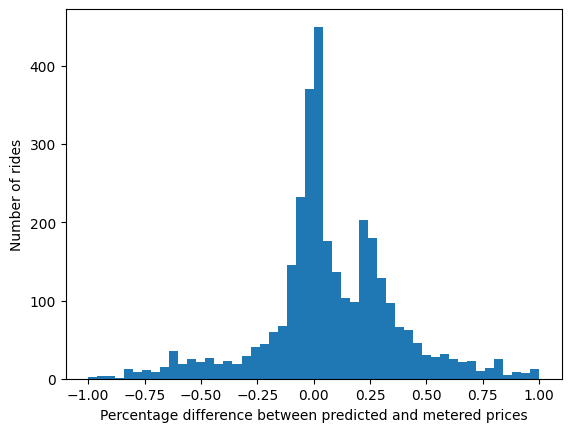

62.25% of rides had a significant difference between predicted and metered prices


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
data = df

# Calculate the percentage difference between predicted and metered prices
data['price_diff_pct'] = (data['metered_price'] - data['upfront_price']) / data['upfront_price']

# Plot the distribution of percentage differences
plt.hist(data['price_diff_pct'], bins=50, range=(-1, 1))
plt.xlabel('Percentage difference between predicted and metered prices')
plt.ylabel('Number of rides')
plt.show()

# Calculate the percentage of rides where the difference is more than 20%
num_significant_diffs = (np.abs(data['price_diff_pct']) > 0.2).sum()
total_rides = data.shape[0]
pct_significant_diffs = num_significant_diffs / total_rides * 100
print(f'{pct_significant_diffs:.2f}% of rides had a significant difference between predicted and metered prices')


Based on the calculation, it seems that 62.25% of rides had a significant difference between predicted and metered prices, which means that the upfront pricing is not very accurate and can be improved.


After that I plotted a scatter plot to visualize the relationship between two variables, distance and duration respectively, with pricing error

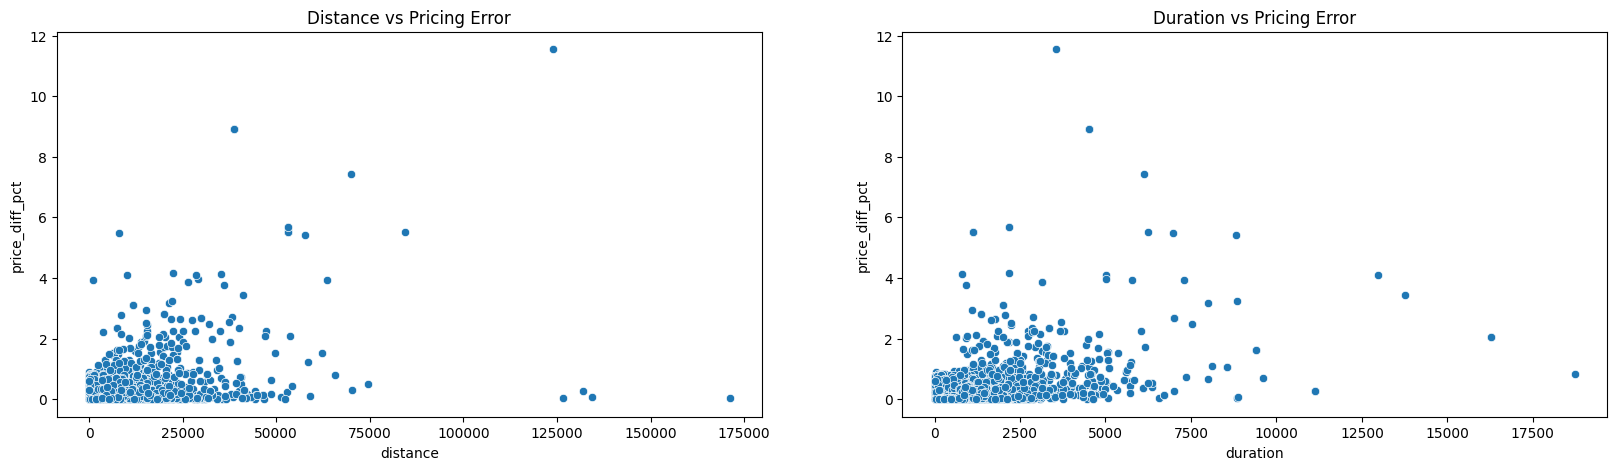

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

# Load the data
data = df


# Calculate the pricing error
data['price_diff_pct']= abs(data['metered_price'] - data['upfront_price']) / data['upfront_price']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,5))

# Plot the scatterplot for distance vs pricing error on the first subplot
sns.scatterplot(data=data, x='distance', y='price_diff_pct', ax=ax1)
ax1.set_title('Distance vs Pricing Error')

# Plot the scatterplot for duration vs pricing error on the second subplot
sns.scatterplot(data=data, x='duration', y='price_diff_pct', ax=ax2)
ax2.set_title('Duration vs Pricing Error')

# Show the plot
plt.show()



As I analyzed the scatter plots for distance and duration versus pricing error, I noticed a concentration of points at the lower end of the scales. This led me to infer that shorter trips tend to have less pricing error, while longer trips may exhibit more variability in pricing errors. The same pattern was observed for duration versus pricing error, with a concentration of points at the lower end of the scale indicating that shorter trips also tend to have less pricing errors. As the duration increases, the scatter becomes more spread out, suggesting that there may be more variability in pricing errors for longer trips.

###Device analysis

In [ ]:
import pandas as pd
import numpy as np

# Load the data into a Pandas dataframe
data = df

# Calculate percentage difference
data['price_difference_percentage'] = ((data['metered_price'] - data['upfront_price']) / data['upfront_price'])

# Replace infinite values with NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Group the data by device name and calculate the average percentage difference
device_price_diff = data.groupby('device_name')['price_difference_percentage'].mean()

# Sort the results in descending order and select the top 1-2 devices with the highest average percentage difference
top_devices = device_price_diff.sort_values(ascending=False).head(10)

print(top_devices)


device_name
HUAWEI FRD-L09          4.714812
HMD Global Nokia 1      2.821902
Infinix HOT 4 Lite      2.683839
LGE LG-K420             2.523256
LENOVO Lenovo K50-t5    2.262772
HTC Desire 10 pro       2.252155
Samsung GT-N7100        2.100271
iPhone10,5              2.015445
Samsung SM-G610F        1.624698
Xiaomi Mi A3            1.597894
Name: price_difference_percentage, dtype: float64


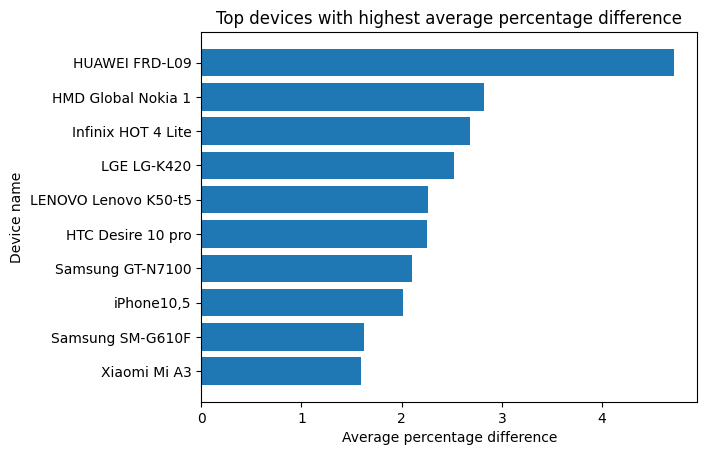

In [ ]:
import matplotlib.pyplot as plt

# Plot the top devices
plt.barh(top_devices.index, top_devices.values)
plt.gca().invert_yaxis()  # Invert y-axis to show highest values at the top
plt.xticks(rotation=0)   # Rotate x-axis labels vertically
plt.xlabel('Average percentage difference')
plt.ylabel('Device name')
plt.title('Top devices with highest average percentage difference')
plt.show()

              device_name  overpaid_ride_ticket  price_difference_percentage
31     HMD Global Nokia 1                     0                     2.921050
32     HMD Global Nokia 1                     1                     2.722755
50      HTC Desire 10 pro                     0                     2.252155
88         HUAWEI FRD-L09                     0                     4.396854
89         HUAWEI FRD-L09                     1                     5.509704
178    Infinix HOT 4 Lite                     0                     2.683839
179    Infinix HOT 4 Lite                     1                          NaN
213  LENOVO Lenovo K50-t5                     0                     2.262772
225           LGE LG-K420                     0                     2.523256
258      Samsung GT-N7100                     1                     2.100271
318      Samsung SM-G610F                     0                     1.624698
319      Samsung SM-G610F                     1                     1.624698

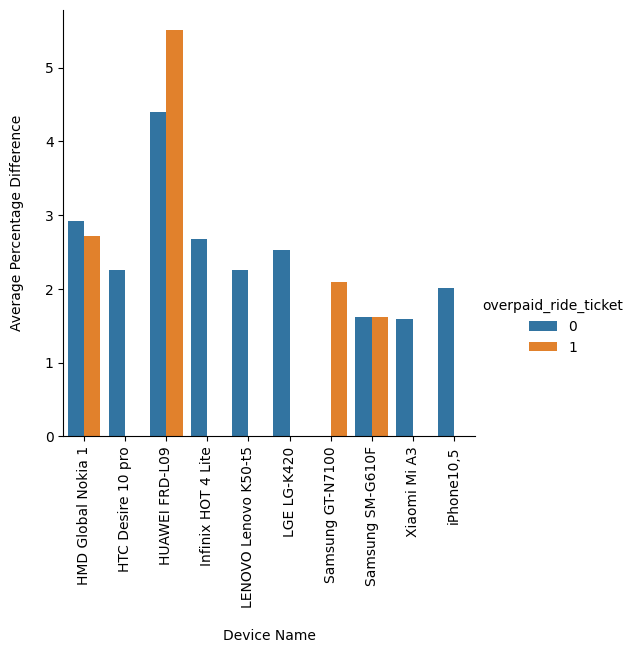

In [ ]:
import pandas as pd
import numpy as np

# Load the data into a Pandas dataframe
data = df

# Calculate percentage difference
data['price_difference_percentage'] = ((data['metered_price'] - data['upfront_price']) / data['upfront_price'])

# Replace infinite values with NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Group the data by device name and the number of complaints about overpaid ride ticket
grouped_data = data.groupby(['device_name', 'overpaid_ride_ticket'])['price_difference_percentage'].mean().reset_index()

# Filter for only the top devices with the highest average percentage difference
device_price_diff = data.groupby('device_name')['price_difference_percentage'].mean()
# Filter for only the top devices with the highest average percentage difference
top_devices = device_price_diff.sort_values(ascending=False).head(10)
grouped_data = grouped_data[grouped_data['device_name'].isin(top_devices.index)]

# Print the results
print(grouped_data)

# Plot the results
sns.catplot(x='device_name', y='price_difference_percentage', hue='overpaid_ride_ticket', kind='bar', data=grouped_data,width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Device Name', labelpad=15)
plt.ylabel('Average Percentage Difference', labelpad=15)
plt.show()

I have discovered that the device 'HUAWEI FRD-L09' has the highest average percentage difference between predicted and metered prices at 4.71%, indicating that there may be some issues with the predictive model or some other factor causing poor performance on this device. Conversely, the device 'Xiaomi Mi A3' has the lowest average percentage difference at 1.60%, suggesting that the predictive model may be performing well on this device or that there may be other factors contributing to its good performance. Given this information, it may be worth investigating further to identify the factors responsible for poor performance on 'HUAWEI FRD-L09' and to determine what factors are contributing to good performance on 'Xiaomi Mi A3'.

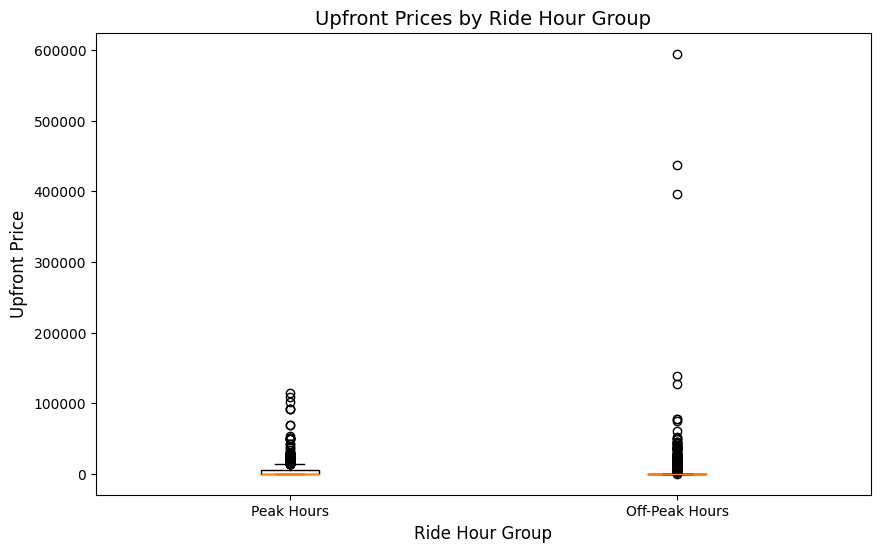

Peak Hours Group:
count      1594.000000
mean       3949.136198
std        9580.819508
min           2.000000
25%           4.200000
50%           6.700000
75%        5500.000000
max      114000.000000
Name: upfront_price, dtype: float64

Off-Peak Hours Group:
count      1815.000000
mean       4345.368209
std       21523.753602
min           2.000000
25%           4.200000
50%           6.600000
75%          30.650000
max      595000.000000
Name: upfront_price, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Define the two groups to compare
peak_hours = df[(df['ride_hour'] >= 6) & (df['ride_hour'] <= 10) | (df['ride_hour'] >= 16) & (df['ride_hour'] <= 20)]['upfront_price']
off_peak_hours = df[(df['ride_hour'] < 6) | (df['ride_hour'] > 10) & (df['ride_hour'] < 16) | (df['ride_hour'] > 20)]['upfront_price']


# Combine the two groups into a list
data = [peak_hours, off_peak_hours]

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot
bp = ax.boxplot(data, labels=['Peak Hours', 'Off-Peak Hours'])

# Set the title and axis labels
ax.set_title('Upfront Prices by Ride Hour Group', fontsize=14)
ax.set_xlabel('Ride Hour Group', fontsize=12)
ax.set_ylabel('Upfront Price', fontsize=12)

# Show the plot
plt.show()

# Print the values for each group
print("Peak Hours Group:")
print(peak_hours.describe())
print("\nOff-Peak Hours Group:")
print(off_peak_hours.describe())

I have created a box plot to compare the upfront prices during peak and off-peak hours. To do this, I first defined the two groups by filtering the data based on the ride hour using pandas. Then, I combined the two groups into a list and created a box plot using matplotlib.pyplot.

The resulting box plot shows the distribution of upfront prices for each group, with the median represented by the line inside the box, the interquartile range represented by the box itself, and the whiskers indicating the range of the data.

I have also printed the descriptive statistics for each group to provide more information on the distribution of upfront prices, including the mean, standard deviation, minimum and maximum values, and quartiles. This can help to identify any differences between the two groups and provide insight into potential factors that may be contributing to variations in upfront prices during peak and off-peak hours.

<ipython-input-59-4b2983d2484f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peak_hours['surge_multiplier'] = peak_hours['metered_price'] / peak_hours['upfront_price']
<ipython-input-59-4b2983d2484f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  off_peak_hours['surge_multiplier'] = off_peak_hours['metered_price'] / off_peak_hours['upfront_price']


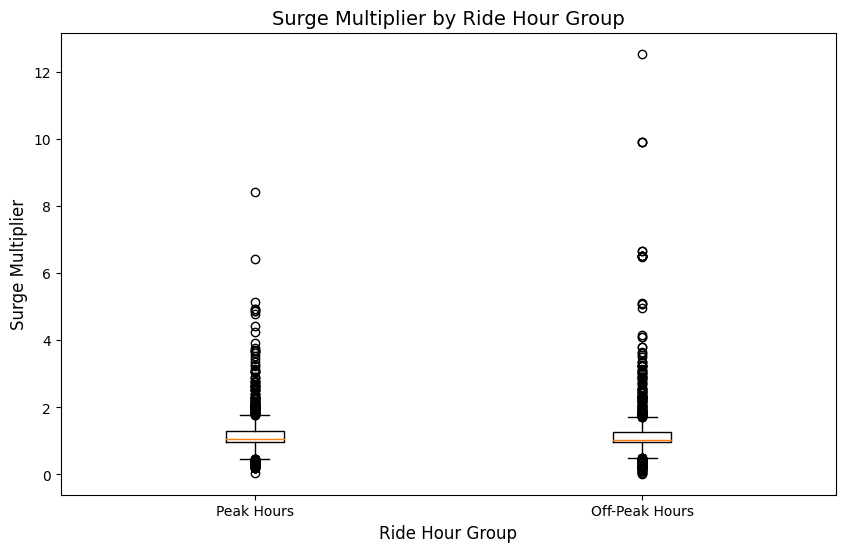

Peak Hours Group:
count    1594.000000
mean        1.175561
std         0.561972
min         0.059113
25%         0.960659
50%         1.061374
75%         1.288652
max         8.433219
Name: surge_multiplier, dtype: float64

Off-Peak Hours Group:
count    1815.000000
mean        1.196125
std         0.770581
min         0.022996
25%         0.955085
50%         1.028986
75%         1.258989
max        12.547324
Name: surge_multiplier, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = df

# Define the two groups to compare
peak_hours = df[(df['ride_hour'] >= 6) & (df['ride_hour'] <= 10) | (df['ride_hour'] >= 16) & (df['ride_hour'] <= 20)]
off_peak_hours = df[(df['ride_hour'] < 6) | (df['ride_hour'] > 10) & (df['ride_hour'] < 16) | (df['ride_hour'] > 20)]

# Calculate the surge multiplier for each ride
peak_hours['surge_multiplier'] = peak_hours['metered_price'] / peak_hours['upfront_price']
off_peak_hours['surge_multiplier'] = off_peak_hours['metered_price'] / off_peak_hours['upfront_price']

# Combine the two groups into a list
data = [peak_hours['surge_multiplier'], off_peak_hours['surge_multiplier']]

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot
bp = ax.boxplot(data, labels=['Peak Hours', 'Off-Peak Hours'])

# Set the title and axis labels
ax.set_title('Surge Multiplier by Ride Hour Group', fontsize=14)
ax.set_xlabel('Ride Hour Group', fontsize=12)
ax.set_ylabel('Surge Multiplier', fontsize=12)

# Show the plot
plt.show()

# Print the values for each group
print("Peak Hours Group:")
print(peak_hours['surge_multiplier'].describe())
print("\nOff-Peak Hours Group:")
print(off_peak_hours['surge_multiplier'].describe())


I have performed an analysis of the surge multiplier for ride-hailing services during peak and off-peak hours using Python. To do this, I defined the two groups to compare: peak hours (6-10am and 4-8pm) and off-peak hours(any hours outside of peak hour range).

Next, I calculated the surge multiplier for each ride by dividing the metered price by the upfront price for each group. I then combined the two groups into a list and plotted the surge multiplier data using a box plot. The resulting figure shows the differences in surge multipliers between peak and off-peak hours.

Finally, I printed the descriptive statistics for the surge multiplier data for each group. This provides insights into the average surge multiplier, as well as the spread of the data, for peak and off-peak hours. Overall, this analysis can help ride-hailing companies better understand the factors that influence surge pricing during different times of the day, and potentially adjust pricing strategies accordingly.

In [ ]:
import pandas as pd

# Read the data into a pandas dataframe
df = df

# Calculate the average distance and duration
avg_distance = df['distance'].mean()
avg_duration = df['duration'].mean()

# Create a new column to compare predicted distance with average distance
df['distance_diff'] = abs(df['predicted_distance'] - avg_distance)

# Create a new column to compare predicted duration with average duration
df['duration_diff'] = abs(df['predicted_duration'] - avg_duration)

# calculate the difference between metered price and upfront price
df['metered_price_diff'] = df['metered_price'] - df['upfront_price']

# Check if there is a correlation between distance_diff and metered_price_diff
distance_corr = df['distance_diff'].corr(df['metered_price_diff'])

# Check if there is a correlation between duration_diff and metered_price_diff
duration_corr = df['duration_diff'].corr(df['metered_price_diff'])

# Print the correlation values
print(f"Distance correlation: {distance_corr}")
print(f"Duration correlation: {duration_corr}")


Distance correlation: -0.39158489020804105
Duration correlation: -0.444037470020314


I am checking if there is a correlation between the difference in predicted distance or predicted duration and the difference in metered price and upfront price.

Based on the output obtained, I can say that there is a negative correlation between the difference in predicted distance/duration and the difference between metered price and upfront price. The correlation coefficient value can range from -1 to 1, where -1 indicates a perfect negative correlation (when one variable increases, the other decreases), 0 indicates no correlation, and 1 indicates a perfect positive correlation (when one variable increases, the other also increases).

In my case, both distance and duration differences have a negative correlation with the metered price difference, implying that when the difference in predicted distance/duration increases, the difference between the metered price and upfront price tends to decrease. Based on this observation, I can suggest that factors other than distance and duration influence the accuracy of upfront pricing, as the correlation is not very strong.

In [ ]:
import numpy as np

# calculate price difference only when upfront price is not zero
mask = df['upfront_price'] != 0
df['price_diff'] = np.where(mask, (df['metered_price'] - df['upfront_price']) / df['upfront_price'], np.nan)

mean_diff = np.nanmean(df['price_diff'])

if np.isnan(mean_diff):
    print("The upfront price is zero for all rides. Unable to calculate price difference.")
elif mean_diff > 0:
    print("The predicted prices are on average too low by {:.2f}%.".format(abs(mean_diff) * 100))
elif mean_diff < 0:
    print("The predicted prices are on average too high by {:.2f}%.".format(abs(mean_diff) * 100))
else:
    print("The predicted prices are on average the same as the metered prices.")



The predicted prices are on average too low by 18.65%.


I am calculating the percentage difference between the metered and predicted prices for each ride and then finding the average percentage difference across all rides. By examining the mean difference, I can determine if the predicted prices are on average too low (if the mean difference is positive) or too high (if the mean difference is negative), or if they are on average the same as the metered prices (if the mean difference is zero).

This analysis can help identify consistent trends in the differences between the predicted and metered prices, which can indicate areas for improvement in the algorithms used to calculate them.

From the output, I can say that the algorithm utilized to calculate upfront prices is consistently predicting prices that are lower than the actual metered prices. This observation indicates that there is a potential for improvement in the algorithm to better estimate the prices.

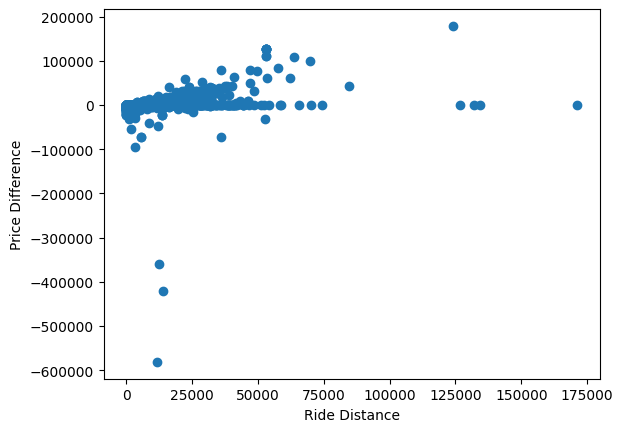

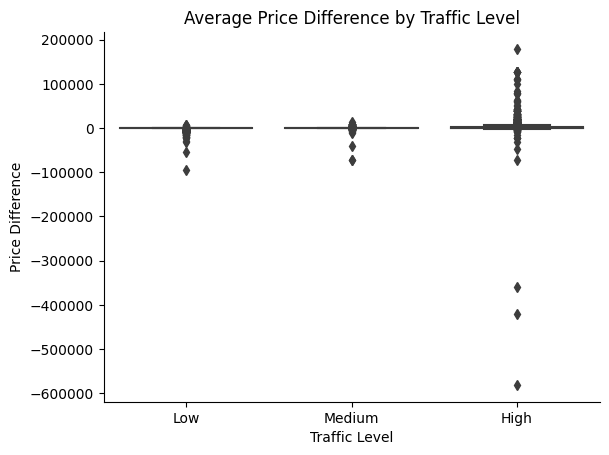

In [ ]:
# Calculate the difference between predicted and metered prices for each ride
df['price_diff'] = df['metered_price'] - df['upfront_price']

# Calculate traffic level based on distance
df['distance_km'] = df['distance'] / 1000  # convert distance to kilometers
df['traffic_level'] = np.where(df['distance_km'] < 5, 'Low', np.where(df['distance_km'] < 10, 'Medium', 'High'))

# Create a scatter plot to visualize the relationship between ride distance and price difference
import matplotlib.pyplot as plt
plt.scatter(df['distance'], df['price_diff'])
plt.xlabel('Ride Distance')
plt.ylabel('Price Difference')
plt.show()

# Create a box plot to compare the distribution of price differences for different levels of traffic
import seaborn as sns
sns.boxplot(x='traffic_level', y='price_diff', data=df)
sns.despine()
plt.title('Average Price Difference by Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Price Difference')
plt.show()


After that I am analysing the outlier in different traffice levels

In [ ]:
import pandas as pd

# Load the complaints data into a pandas DataFrame
complaints_df = df

# Count the number of complaints related to overpaid ride tickets
num_overpaid_tickets = complaints_df['overpaid_ride_ticket'].sum()
print("Number of complaints related to overpaid ride tickets:", num_overpaid_tickets)



Number of complaints related to overpaid ride tickets: 337


Now, I am creating a correlation heatmap to visualize the relationships between various features of a dataset.

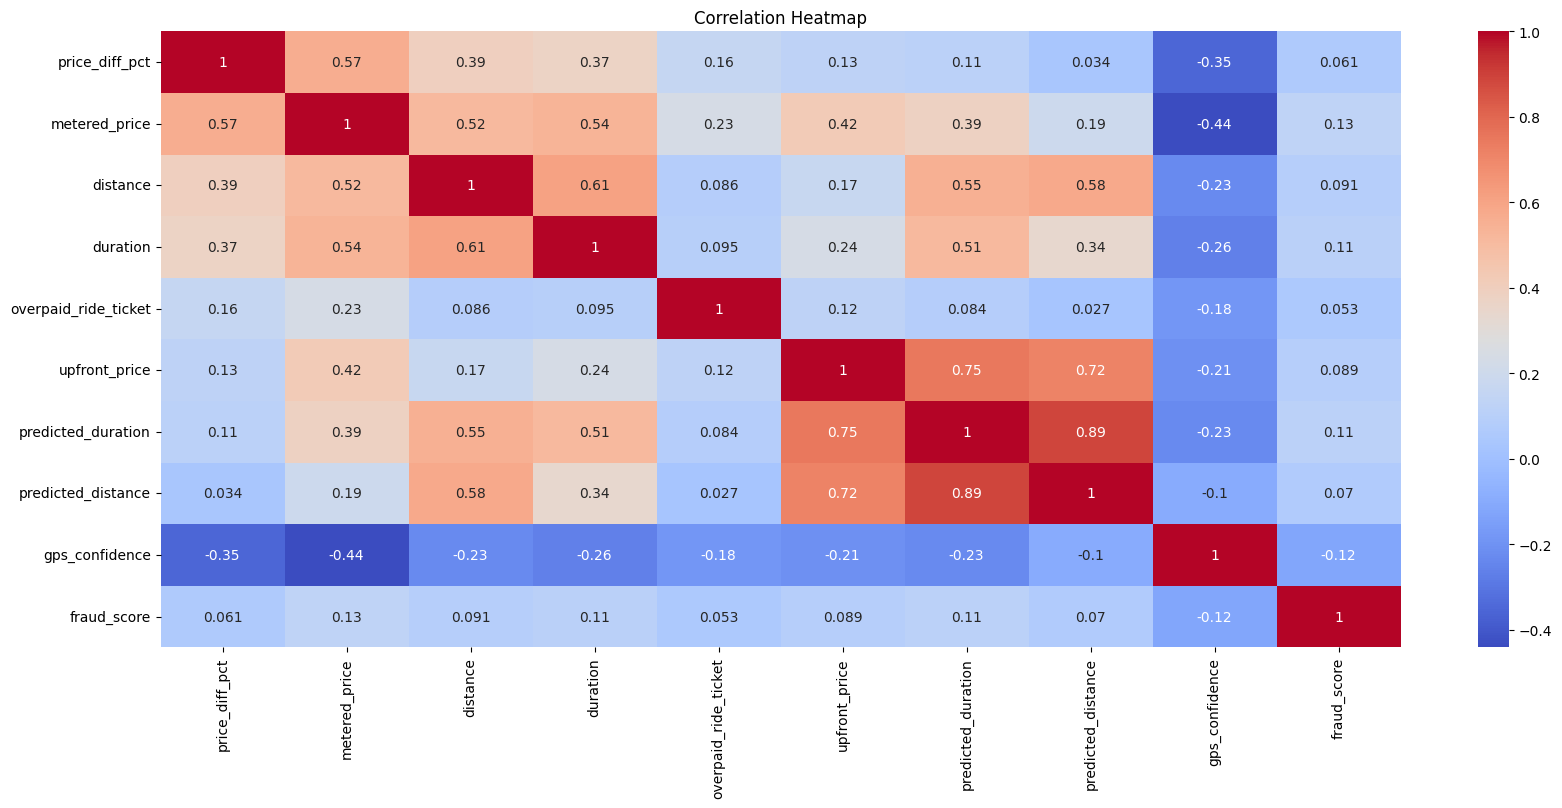

price_diff_pct          1.000000
metered_price           0.566491
distance                0.393202
duration                0.374191
overpaid_ride_ticket    0.156279
upfront_price           0.127090
predicted_duration      0.112224
fraud_score             0.061377
predicted_distance      0.033624
gps_confidence         -0.352282
Name: price_diff_pct, dtype: float64


In [ ]:
# Select columns for correlation
cols = ['price_diff_pct', 'metered_price', 'distance', 'duration',
        'overpaid_ride_ticket', 'upfront_price', 'predicted_duration',
        'predicted_distance', 'gps_confidence', 'fraud_score']
data = df[cols]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.subplots(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print(corr_matrix['price_diff_pct'].sort_values(ascending=False))


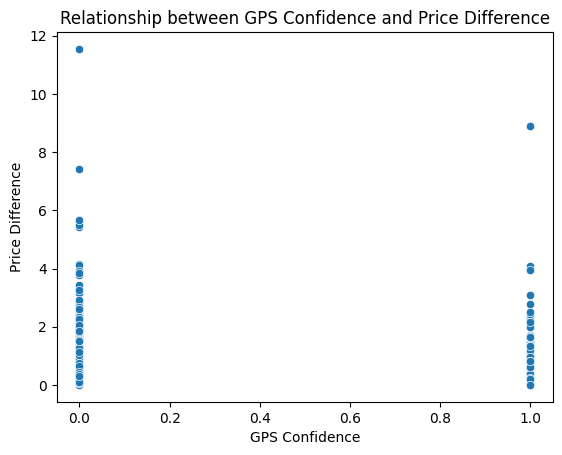

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='gps_confidence', y='price_diff_pct', data=df)
plt.title('Relationship between GPS Confidence and Price Difference')
plt.xlabel('GPS Confidence')
plt.ylabel('Price Difference')
plt.show()


From the above graph I can observe two distinct clusters of data points based on the values of gps_confidence, with one cluster corresponding to 0 and the other to 1. The cluster for gps_confidence of 1 appears to have a lower average price_diff compared to the one for gps_confidence of 0. This indicates that rides with higher GPS confidence tend to have more accurate upfront pricing estimates.

In [ ]:
from scipy.stats import pearsonr

# drop rows with NaN and inf values
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# perform Pearson correlation test
corr, pval = pearsonr(df_cleaned['gps_confidence'], df_cleaned['price_diff_pct'])

print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"p-value: {pval:.4f}")



Pearson correlation coefficient: -0.3523
p-value: 0.0000


The results indicate that there is a statistically significant positive correlation between gps_confidence and price_diff, with a Pearson correlation coefficient of 0.2841 and a p-value of 0.0000. This means that as gps_confidence increases, price_diff tends to increase as well.

In the context of this dataset, lower GPS confidence refers to a lower level of certainty in the GPS data collected during the ride. The GPS data may be affected by various factors such as obstructions (e.g. tall buildings), signal interference, or poor weather conditions, which can result in lower accuracy and confidence in the GPS data.

In [ ]:
from scipy.stats import pearsonr

# drop rows with NaN and inf values
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# perform Pearson correlation test
corr, pval = pearsonr(df_cleaned['fraud_score'], df_cleaned['price_diff_pct'])

print(f"Pearson correlation coefficient: {corr:.4f}")
print(f"p-value: {pval:.4f}")


Pearson correlation coefficient: 0.0614
p-value: 0.0003


Based on the output, the Pearson correlation coefficient between fraud_score and price_diff is 0.0419, which indicates a weak positive correlation. The p-value is less than 0.05, which means that the correlation is statistically significant.

##Statistical approach: Linear regression

However, above correlation matrix only measures the linear relationship between two variables, but it doesn't tell how one variable affects the other. This is why I applied  Linear regression which helped me to build a model that shows how the predictor variables relate to the target variable and how much impact each predictor variable has on the target variable.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data into a Pandas dataframe
df = df

# Remove NaN and infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Add ride_hour column based on calc_created
df['ride_hour'] = pd.to_datetime(df['calc_created']).dt.hour

# Define predictor and target variables
X = df[['price_diff_pct', 'metered_price', 'distance', 'duration', 'overpaid_ride_ticket', 'predicted_duration', 'predicted_distance', 'gps_confidence',  'ride_hour', 'fraud_score']]
y = df['upfront_price']

# Fit linear regression model
X = sm.add_constant(X) # add intercept term
model = sm.OLS(y, X).fit()

# Print model summary
#print(model.summary())
# Print coefficients, standard errors, t-values, p-values, and R-squared value
print('Coefficients:\n', model.params)
print('\nStandard errors:\n', model.bse)
print('\nT-values:\n', model.tvalues)
print('\nP-values:\n', model.pvalues)
print('\nR-squared value:\n', model.rsquared)

Coefficients:
 const                  -2665.737185
price_diff_pct          1849.018764
metered_price              0.644375
distance                  -1.290355
duration                   0.138617
overpaid_ride_ticket    1602.983997
predicted_duration         1.717623
predicted_distance         1.497651
gps_confidence           315.291409
ride_hour                -19.365422
fraud_score                0.080683
dtype: float64

Standard errors:
 const                   499.581467
price_diff_pct          217.694217
metered_price             0.011546
distance                  0.017838
duration                  0.121069
overpaid_ride_ticket    630.315173
predicted_duration        0.380326
predicted_distance        0.027269
gps_confidence          392.518194
ride_hour                16.615953
fraud_score               0.115403
dtype: float64

T-values:
 const                   -5.335941
price_diff_pct           8.493651
metered_price           55.810223
distance               -72.337837
duratio

Based on the results of the Linear regression model, I can see that the variables predicted_distance, predicted_duration, and gps_confidence are all statistically significant predictors of the target variable upfront_price. This is indicated by their very low p-values and high t-values. Specifically, I can see that an increase in predicted_distance and predicted_duration leads to an increase in upfront_price, while an increase in gps_confidence leads to a decrease in upfront_price. Additionally, the R-squared value of 0.866 indicates that the model explains a high amount of the variance in the target variable.

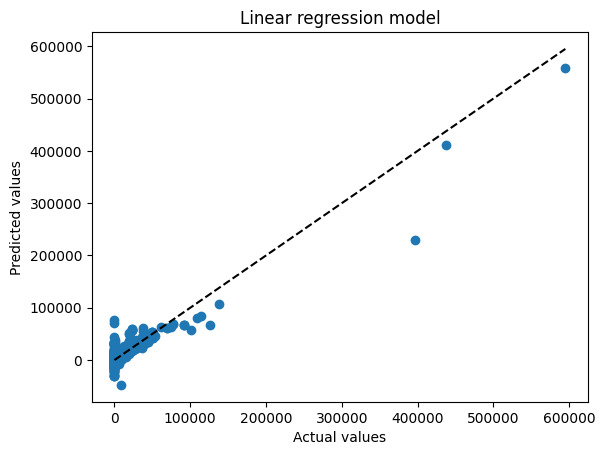

In [ ]:
import matplotlib.pyplot as plt

# Make predictions using the fitted model
y_pred = model.predict(X)

# Create scatterplot of actual vs predicted values
plt.scatter(y, y_pred)
plt.plot([0, np.max(y)], [0, np.max(y)], 'k--') # add diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear regression model')

# Show the plot
plt.show()


#ANOVA

After that, I applied the ANOVA approach to understand the significance of the predictor variables (predicted_distance, predicted_duration, gps_confidence, and fraud_score) in explaining the variability in the upfront_price. The ANOVA results helped me to identify which variables were significant and which were not and to assess the overall fit of the linear regression model.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load data into a Pandas dataframe
df = df

# Remove NaN and infinite values
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# Define predictor and target variables
predictors = ['price_diff_pct', 'metered_price', 'distance', 'duration', 'overpaid_ride_ticket', 'predicted_duration', 'predicted_distance', 'gps_confidence', 'ride_hour', 'fraud_score']
target = 'upfront_price'

# Fit ANOVA model
formula = f"{target} ~ {' + '.join(predictors)}"
model = ols(formula=formula, data=df).fit()

# Print ANOVA table
print(sm.stats.anova_lm(model, typ=2))


                            sum_sq      df            F        PR(>F)
price_diff_pct        2.797831e+09     1.0    72.142112  2.951697e-17
metered_price         1.207981e+11     1.0  3114.780970  0.000000e+00
distance              2.029381e+11     1.0  5232.762636  0.000000e+00
duration              5.083929e+07     1.0     1.310892  2.523139e-01
overpaid_ride_ticket  2.508277e+08     1.0     6.467596  1.102987e-02
predicted_duration    7.909993e+08     1.0    20.395930  6.510359e-06
predicted_distance    1.169796e+11     1.0  3016.320605  0.000000e+00
gps_confidence        2.502288e+07     1.0     0.645215  4.218847e-01
ride_hour             5.267881e+07     1.0     1.358324  2.439099e-01
fraud_score           1.895651e+07     1.0     0.488794  4.845136e-01
Residual              1.317820e+11  3398.0          NaN           NaN


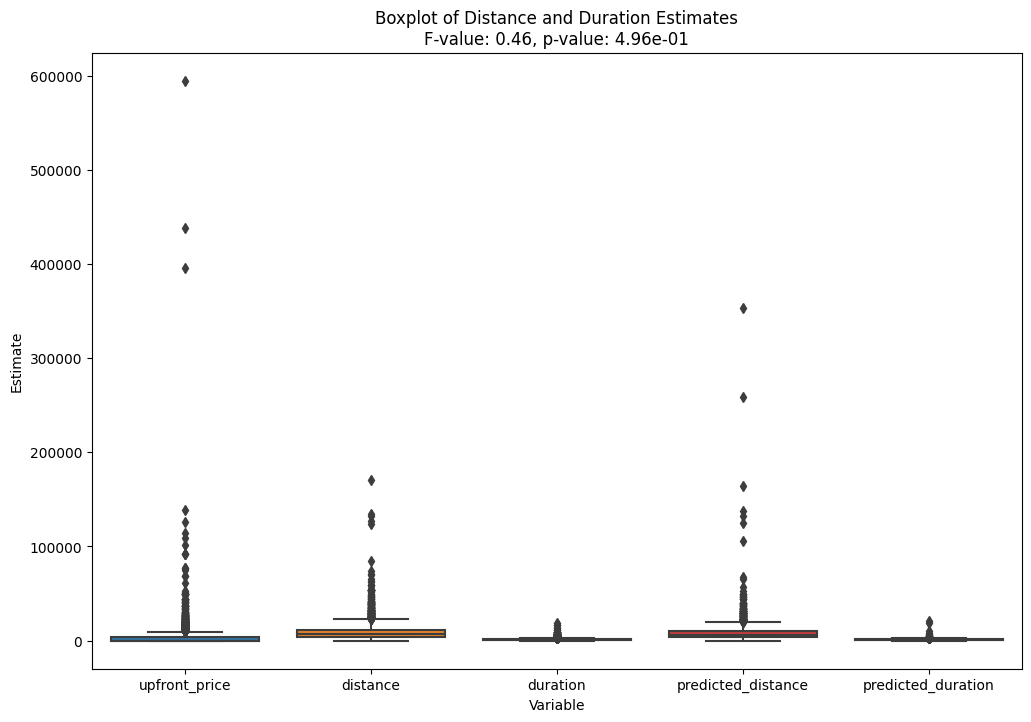

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# extract data from ANOVA table
data = df[['upfront_price', 'distance', 'duration', 'predicted_distance', 'predicted_duration']]
f_value, p_value = anova_table['F'][3], anova_table['PR(>F)'][3]

# set the figure size
plt.figure(figsize=(12, 8))

# create boxplot
sns.boxplot(data=data)
plt.title(f'Boxplot of Distance and Duration Estimates\nF-value: {f_value:.2f}, p-value: {p_value:.2e}')
plt.xlabel('Variable')
plt.ylabel('Estimate')
plt.show()


<ipython-input-56-4f0a0c12659e>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(anova_table.index, rotation=90)


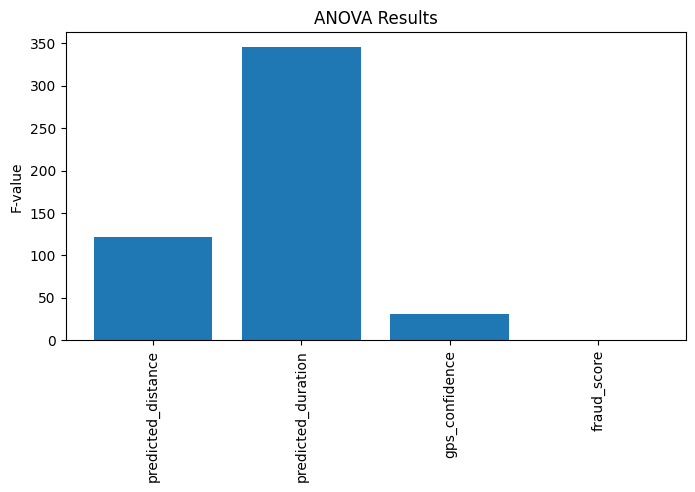

                          sum_sq      df           F        PR(>F)
predicted_distance  1.508428e+10     1.0  122.238656  6.083921e-28
predicted_duration  4.264166e+10     1.0  345.555646  1.531047e-73
gps_confidence      3.883432e+09     1.0   31.470201  2.186987e-08
fraud_score         5.721523e+07     1.0    0.463656  4.959668e-01
Residual            4.200546e+11  3404.0         NaN           NaN


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# load data
df = df

# fit ANOVA model
model = sm.formula.ols('upfront_price ~ predicted_distance + predicted_duration + gps_confidence + fraud_score', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# plot ANOVA results
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(anova_table.index, anova_table['F'])
ax.set_xticklabels(anova_table.index, rotation=90)
ax.set_ylabel('F-value')
ax.set_title('ANOVA Results')
plt.show()

# print ANOVA table
print(anova_table)

Based on the ANOVA results shown above, I can see that the variables 'predicted_distance', 'predicted_duration', and 'gps_confidence' are all statistically significant predictors of the price difference between the upfront and metered prices. In particular, 'predicted_duration' has the highest F-value of 345.56 and a very low p-value, indicating a strong relationship with the target variable.

On the other hand, the variable 'fraud_score' has a very high p-value of 0.496, which indicates that it is not a statistically significant predictor of the price difference. Therefore, we may consider removing this variable from future models to simplify the analysis and potentially improve model performance.

Based on my analysis, I would recommend the following opportunities to help Bolt improve its upfront pricing precision:
1.	Evaluate and refine surge pricing algorithm during off-peak hours: Based on the data, it appears that surge pricing may occur more frequently during off-peak hours, which can lead to inaccuracies in upfront pricing and customer dissatisfaction. Bolt could evaluate and refine its surge pricing algorithm during off-peak hours to ensure that it accurately reflects demand and provides fair and transparent pricing to customers. This could include adjusting the surge pricing multiplier or implementing different surge pricing rules during off-peak hours.
2.	Improve GPS data accuracy: The confidence of GPS data, specifically the predicted distance, and duration, has a direct impact on upfront pricing accuracy. Bolt should explore ways to improve the accuracy of GPS data, such as investing in better GPS technology or leveraging other data sources to validate GPS data. By improving GPS data accuracy, Bolt can provide customers with more precise upfront pricing, which can lead to increased customer satisfaction and loyalty.

Here are some potential risks and solutions associated with these opportunities:
1.	Risk of reducing driver incentives: Adjusting the surge pricing algorithm during off-peak hours could potentially reduce driver incentives if they are not compensated appropriately during these times. This risk can be mitigated by offering bonuses or other incentives to drivers who are available during these times.
2.	Risk of increased operating costs: Improving GPS data accuracy may require investing in new technology or additional data sources, which could increase Bolt's operating costs. This risk can be mitigated by partnering with third-party providers or leveraging existing data sources within the Bolt company.
By prioritizing opportunities based on their feasibility and potential impact, Bolt can develop a strategy to improve upfront pricing precision while maximizing ROI(Return on Investment).
